# UUM625 Project 1
## Occupancy Detection Using Classification Algorithms

#### Prepared by Muhammet Aksoy

**Installing Libraries and Fetching the Data**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics

trainData = pd.read_csv("E:\Desktop\BİTİRME ÇALIŞMASI\Projects\Project 1\datatraining.txt")
trainData

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.180000,27.272000,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.150000,27.267500,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.150000,27.245000,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.150000,27.200000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.100000,27.200000,426.0,704.500000,0.004757,1
6,2015-02-04 17:55:59,23.100000,27.200000,419.0,701.000000,0.004757,1
7,2015-02-04 17:57:00,23.100000,27.200000,419.0,701.666667,0.004757,1
8,2015-02-04 17:57:59,23.100000,27.200000,419.0,699.000000,0.004757,1
9,2015-02-04 17:58:59,23.100000,27.200000,419.0,689.333333,0.004757,1
10,2015-02-04 18:00:00,23.075000,27.175000,419.0,688.000000,0.004745,1


**Visualization**

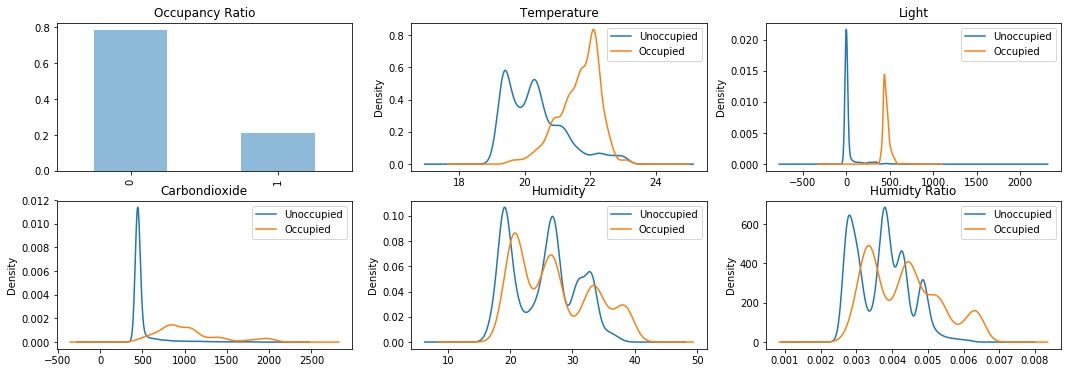

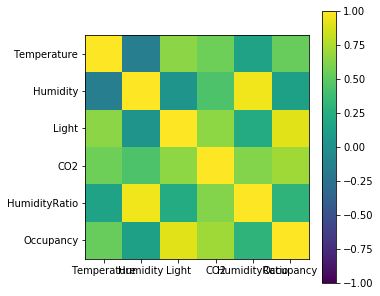

In [2]:
fig = plt.figure(figsize=(18,6))

plt.subplot2grid((2,3), (0,0))
trainData.Occupancy.value_counts(normalize=True).plot(kind='bar', alpha=0.5)
plt.title("Occupancy Ratio")

#Densities of the features in occupied and non-occupied status.
plt.subplot2grid((2,3), (0,1))
for x in [0, 1]:
    trainData.Temperature[trainData.Occupancy == x].plot(kind="kde")
plt.title("Temperature")
plt.legend(("Unoccupied","Occupied"))

plt.subplot2grid((2,3), (0,2))
for x in [0, 1]:
    trainData.Light[trainData.Occupancy == x].plot(kind="kde")
plt.title("Light")
plt.legend(("Unoccupied","Occupied"))
        
plt.subplot2grid((2,3), (1,0))
for x in [0, 1]:
    trainData.CO2[trainData.Occupancy == x].plot(kind="kde")
plt.title("Carbondioxide")
plt.legend(("Unoccupied","Occupied"))
           
plt.subplot2grid((2,3), (1,1))
for x in [0, 1]:
    trainData.Humidity[trainData.Occupancy == x].plot(kind="kde")
plt.title("Humidity")
plt.legend(("Unoccupied","Occupied"))
               
plt.subplot2grid((2,3), (1,2))
for x in [0, 1]:
    trainData.HumidityRatio[trainData.Occupancy == x].plot(kind="kde")
plt.title("Humidty Ratio")
plt.legend(("Unoccupied","Occupied"))

#2D array of inter-column correlation.
correlations = trainData.corr()

#Plotting the correlation matrix.
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
cax = ax.imshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
names = ["Temperature", "Humidity", "Light", "CO2", "HumidityRatio", "Occupancy"]
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

**Checking for Missing Values**

In [3]:
#Returns True if there is any missing value.
trainData.isnull().values.any()

False

**Adding New Features**

In [4]:
#Create a column with all the rows 0.
trainData["LightsOff"] = 0

#If light is 0, it is assumed lights off, therefore LightsOff=1.
trainData.loc[trainData.Light < 0, "LightsOff"] = 1

#Division of Humidity by HumidityRatio to emphasize the subtle difference.
trainData["HdivR"] = (trainData["Humidity"])/(trainData["HumidityRatio"])
trainData

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,LightsOff,HdivR
1,2015-02-04 17:51:00,23.180000,27.272000,426.0,721.250000,0.004793,1,0,5689.978568
2,2015-02-04 17:51:59,23.150000,27.267500,429.5,714.000000,0.004783,1,0,5700.394400
3,2015-02-04 17:53:00,23.150000,27.245000,426.0,713.500000,0.004779,1,0,5700.430574
4,2015-02-04 17:54:00,23.150000,27.200000,426.0,708.250000,0.004772,1,0,5700.502921
5,2015-02-04 17:55:00,23.100000,27.200000,426.0,704.500000,0.004757,1,0,5717.897920
6,2015-02-04 17:55:59,23.100000,27.200000,419.0,701.000000,0.004757,1,0,5717.897920
7,2015-02-04 17:57:00,23.100000,27.200000,419.0,701.666667,0.004757,1,0,5717.897920
8,2015-02-04 17:57:59,23.100000,27.200000,419.0,699.000000,0.004757,1,0,5717.897920
9,2015-02-04 17:58:59,23.100000,27.200000,419.0,689.333333,0.004757,1,0,5717.897920
10,2015-02-04 18:00:00,23.075000,27.175000,419.0,688.000000,0.004745,1,0,5726.657861


**Train, Validation and Test Datasets**

In [5]:
valData = pd.read_csv("E:\Desktop\BİTİRME ÇALIŞMASI\Projects\Project 1\datatest.txt")
testData = pd.read_csv("E:\Desktop\BİTİRME ÇALIŞMASI\Projects\Project 1\datatest2.txt")

#Applying the same transformations.
valData["LightsOff"] = 0
valData.loc[valData.Light < 0, "LightsOff"] = 1
valData["HdivR"] = (valData["Humidity"])/(valData["HumidityRatio"])

testData["LightsOff"] = 0
testData.loc[testData.Light < 0, "LightsOff"] = 1
testData["HdivR"] = (testData["Humidity"])/(testData["HumidityRatio"])

#Merging Test-1 and Train-1 to get a single training dataset. Prediction will be made only on Test-2.
train_data = pd.concat([trainData, valData])

# Machine Learning Models

**Logistic Regression Build**

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [9]:
#Features to find the best hyperparameters.
target = train_data["Occupancy"].values
features = train_data[["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]].values

#Using gridsearch to tune hyperparameters. The model will go over a specified range of parameters and return the best.
solver = ["newton-cg", "saga", "liblinear", "lbfgs", "sag"]
C = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]        #C:inverse of regularization strength
random_state = [1, 2, 3, 4, 5]                                 #No. of random seeds to shuffle the data.
fit_intercept = [True, False]                                  #Add a bias or not.

param_grid = dict(solver=solver, C=C, random_state=random_state, fit_intercept=fit_intercept)

LR = LogisticRegression()
tunedLR = GridSearchCV(estimator=LR, param_grid=param_grid, cv=3, n_jobs=-1) #cv=n, n-fold cross-validation. 
trainedLR = tunedLR.fit(features, target)

print (trainedLR.best_score_, trainedLR.best_params_)

**Logistic Regression Prediction**

In [10]:
#Preparing different feature combinations to feed the model.
target_1 = train_data["Occupancy"].values
features_1 = train_data[["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]].values
features_2 = train_data[["Temperature", "Humidity", "Light", "CO2", "HumidityRatio", "LightsOff"]].values
features_3 = train_data[["Temperature", "Humidity", "Light", "CO2", "HumidityRatio", "LightsOff", "HdivR"]].values
features_4 = train_data[["Temperature", "Light", "CO2"]].values
features_5 = train_data[["Light", "CO2"]].values
train_features = [features_1, features_2, features_3, features_4, features_5]

#Arranging test data to have the matching shape.
target1 = testData["Occupancy"].values
features1 = testData[["Temperature", "Humidity", "Light", "CO2", "HumidityRatio"]].values
features2 = testData[["Temperature", "Humidity", "Light", "CO2", "HumidityRatio", "LightsOff"]].values
features3 = testData[["Temperature", "Humidity", "Light", "CO2", "HumidityRatio", "LightsOff", "HdivR"]].values
features4 = testData[["Temperature", "Light", "CO2"]]
features5 = testData[["Light", "CO2"]]
test_features = [features1, features2, features3, features4, features5]

#Warm_start=False means it's a fresh solution everytime the .fit method is called.
lr = LogisticRegression(solver="liblinear", C=1.0, random_state=1, fit_intercept=True, warm_start=False)

for x in range(5):
    trainLR = lr.fit(train_features[x], target_1)
    prediction = trainLR.predict(test_features[x])
    
    print(accuracy_score(target1, prediction),
    precision_score(target1, prediction),
    recall_score(target1, prediction),
    confusion_matrix(target1, prediction), sep="\n")

0.9927194421657096
0.9718511450381679
0.9941434846266471
[[7644   59]
 [  12 2037]]
0.9927194421657096
0.9718511450381679
0.9941434846266471
[[7644   59]
 [  12 2037]]
0.992616899097621
0.9722885809842332
0.9931673987310884
[[7645   58]
 [  14 2035]]
0.9930270713699754
0.9736967957914874
0.9936554416788678
[[7648   55]
 [  13 2036]]
0.9922067268252666
0.9686460807600951
0.995119570522206
[[7637   66]
 [  10 2039]]


**Naive-Bayes Build and Prediction**

In [72]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

GNB = GaussianNB()
BNB = BernoulliNB()
MNB = MultinomialNB()
modelsNB = [GNB, BNB, MNB]
namesNB = ["Gaussian", "Bernoulli", "Multinomial"]

#Prediction.
for i in range(3):
    print ("%s" % (namesNB[i]))
    for x in range(5):
        trainedNB = modelsNB[i].fit(train_features[x], target_1)
        prediction = trainedNB.predict(test_features[x])

        print(accuracy_score(target1, prediction),
        precision_score(target1, prediction),
        recall_score(target1, prediction),
        confusion_matrix(target1, prediction),
        "---", sep="\n")
    



Gaussian
0.9583675143560295
0.8362668849774867
0.9970717423133236
[[7303  400]
 [   6 2043]]
---
0.9583675143560295
0.8362668849774867
0.9970717423133236
[[7303  400]
 [   6 2043]]
---
0.9509844134536505
0.812077870480731
0.997559785261103
[[7230  473]
 [   5 2044]]
---
0.9588802296964725
0.8379819524200164
0.9970717423133236
[[7308  395]
 [   6 2043]]
---
0.9710828547990156
0.8813120414328873
0.9965836993655441
[[7428  275]
 [   7 2042]]
---
Bernoulli
0.8248564397046759
0.5454061251664447
0.9995119570522206
[[5996 1707]
 [   1 2048]]
---
0.8248564397046759
0.5454061251664447
0.9995119570522206
[[5996 1707]
 [   1 2048]]
---
0.8248564397046759
0.5454061251664447
0.9995119570522206
[[5996 1707]
 [   1 2048]]
---
0.8248564397046759
0.5454061251664447
0.9995119570522206
[[5996 1707]
 [   1 2048]]
---
0.8248564397046759
0.5454061251664447
0.9995119570522206
[[5996 1707]
 [   1 2048]]
---
Multinomial
0.9398072190319935
0.7779467680608365
0.9985358711566618
[[7119  584]
 [   3 2046]]
---
0.9

**K-Nearest Neighbors Build**

In [70]:
from sklearn.neighbors import KNeighborsClassifier

#Constructing grid of hyperparameters to find the best suiting combination.
n_neighbors = [4, 5, 6]
weights = ["uniform", "distance"]
algorithm = ["ball_tree", "kd_tree", "brute"]
leaf_size = [25, 30, 35]

param_grid = dict(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, leaf_size=leaf_size)

KNC = KNeighborsClassifier()
tunedKNC = GridSearchCV(estimator=KNC, param_grid=param_grid, cv=3, n_jobs=-1)
trainedKNC = tunedKNC.fit(features, target)

print (trainedKNC.best_score_, trainedKNC.best_params_)

0.9501295336787565 {'algorithm': 'ball_tree', 'leaf_size': 25, 'n_neighbors': 5, 'weights': 'uniform'}


**K-Nearest Neighbors Prediction**

In [73]:
knc = KNeighborsClassifier(algorithm="ball_tree", leaf_size=25, n_neighbors=5, weights="uniform")

for x in range(5):
    trainedKNC = knc.fit(train_features[x], target_1)
    prediction = trainedKNC.predict(test_features[x])

    print(accuracy_score(target1, prediction),
    precision_score(target1, prediction),
    recall_score(target1, prediction),
    confusion_matrix(target1, prediction),
    "---", sep="\n")

0.9605209187858901
0.8636363636363636
0.9643728648121035
[[7391  312]
 [  73 1976]]
---
0.9605209187858901
0.8636363636363636
0.9643728648121035
[[7391  312]
 [  73 1976]]
---
0.961033634126333
0.8723784024988844
0.954123962908736
[[7417  286]
 [  94 1955]]
---
0.9618539786710418
0.864723792953458
0.9702293801854563
[[7392  311]
 [  61 1988]]
---
0.9618539786710418
0.864723792953458
0.9702293801854563
[[7392  311]
 [  61 1988]]
---


**Decision Tree Build**

In [11]:
from sklearn.tree import DecisionTreeClassifier

#Hyperparameter tuning.
criterion = ["gini", "entropy"]
splitter = ["best", "random"]
max_features = ["auto", "sqrt", "log2", None]

param_grid = dict(criterion=criterion, splitter=splitter, max_features=max_features)

DTC = DecisionTreeClassifier()
tunedDTC = GridSearchCV(estimator=DTC, param_grid=param_grid, cv=3, n_jobs=-1)
trainedDTC = tunedDTC.fit(features, target)

print (trainedDTC.best_score_, trainedDTC.best_params_)

0.9586417468541821 {'criterion': 'gini', 'max_features': 'log2', 'splitter': 'best'}


**Decision Tree Prediction**

In [18]:
dtc = DecisionTreeClassifier(criterion="entropy", max_features=None, splitter="random")

for x in range(5):
    trainedDTC = dtc.fit(train_features[x], target_1)
    prediction = trainedDTC.predict(test_features[x])

    print(accuracy_score(target1, prediction),
    precision_score(target1, prediction),
    recall_score(target1, prediction),
    confusion_matrix(target1, prediction),
    "---", sep="\n")
    
#Plotting the learning curve with a pre-defined function.
from ipynb.fs.defs.MyFunctions import plot_learning_curve
plot_learning_curve(dtc, "Decision Tree Classifier Learning Curve", features_1, target_1)







0.9532403609515997
0.8455531453362256
0.9511957052220595
[[7347  356]
 [ 100 1949]]
---
0.9509844134536505
0.8196988196988197
0.9829184968277208
[[7260  443]
 [  35 2014]]
---
0.9477030352748155
0.8455321059721599
0.9189848706686189
[[7359  344]
 [ 166 1883]]
---
0.9501640689089418
0.8119760479041916
0.9926793557833089
[[7232  471]
 [  15 2034]]
---
0.9450369155045119
0.8089015924867293
0.9668130795510005
[[7235  468]
 [  68 1981]]
---


ModuleNotFoundError: No module named 'ipynb'

**Random Forest Build**

In [79]:
from sklearn.ensemble import RandomForestClassifier

#Hyperparameter tuning.
n_estimators = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2", None]
min_samples_split = [2, 3, 4, 5]

param_grid = dict(n_estimators=n_estimators, criterion=criterion, max_features=max_features, min_samples_split=min_samples_split)

RFC = RandomForestClassifier()
tunedRFC = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=3, n_jobs=-1)
trainedRFC = tunedRFC.fit(features, target)

print (trainedRFC.best_score_, trainedRFC.best_params_)

0.9692820133234641 {'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 10}


**Random Forest Prediction**

In [81]:
rfc = RandomForestClassifier(criterion="gini", max_features="log2", min_samples_split=4, n_estimators=10)

for x in range(5):
    trainedRFC = rfc.fit(train_features[x], target_1)
    prediction = trainedRFC.predict(test_features[x])

    print(accuracy_score(target1, prediction),
    precision_score(target1, prediction),
    recall_score(target1, prediction),
    confusion_matrix(target1, prediction),
    "---", sep="\n")

0.9765176374077112
0.9073410922112802
0.9892630551488532
[[7496  207]
 [  22 2027]]
---
0.9834905660377359
0.9306569343065694
0.9956076134699854
[[7551  152]
 [   9 2040]]
---
0.9865668580803938
0.9606147934678194
0.9760858955588092
[[7621   82]
 [  49 2000]]
---
0.9888228055783429
0.9575471698113207
0.9907271839921913
[[7613   90]
 [  19 2030]]
---
0.9701599671862182
0.9021043000914913
0.9624206930209859
[[7489  214]
 [  77 1972]]
---


**Gradient Boosting Classifier Build**

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

#Hyperparameter tuning.
loss = ["deviance", "exponential"]
n_estimators = [100, 120, 140]
max_features = ["auto", "sqrt", "log2", None]
min_samples_split = [2, 3]

param_grid = dict(n_estimators=n_estimators, max_features=max_features, min_samples_split=min_samples_split, loss=loss)

GBC = GradientBoostingClassifier()
tunedGBC = GridSearchCV(estimator=GBC, param_grid=param_grid, cv=3)
trainedGBC = tunedGBC.fit(features, target)

print (trainedGBC.best_score_, trainedGBC.best_params_)

0.9567912657290896 {'loss': 'exponential', 'max_features': 'log2', 'min_samples_split': 3, 'n_estimators': 120}


**Gradient Boosting Classifier Prediction**

In [86]:
gbc = GradientBoostingClassifier(loss="exponential", max_features="log2", min_samples_split=3, n_estimators=120)

for x in range(5):
    trainedGBC = gbc.fit(train_features[x], target_1)
    prediction = trainedGBC.predict(test_features[x])

    print(accuracy_score(target1, prediction),
    precision_score(target1, prediction),
    recall_score(target1, prediction),
    confusion_matrix(target1, prediction),
    "---", sep="\n")
    


0.9884126333059885
0.9566037735849057
0.9897510980966325
[[7611   92]
 [  21 2028]]
---
0.9894380639868745
0.9576669802445907
0.9936554416788678
[[7613   90]
 [  13 2036]]
---
0.9732362592288761
0.9067333939945404
0.9726695949243533
[[7498  205]
 [  56 1993]]
---
0.9861566858080394
0.9700392927308448
0.9638848218643241
[[7642   61]
 [  74 1975]]
---
0.9846185397867104
0.936150666054203
0.9946315275744265
[[7564  139]
 [  11 2038]]
---


**Kernelized Support Vector Build**